In [1]:
import json 
import pandas as pd
import bz2

In [2]:
%ls /datasets_1/sagarj/Flickr/

london_photos_lsoa.tsv.bz2


In [3]:
# with bz2.open("/datasets_1/sagarj/Flickr/london_photos_lsoa.tsv.bz2", "rb") as f:

#     # Decompress data from file

#     content = f.read()

In [3]:
df = pd.read_csv('/datasets_1/sagarj/Flickr/london_photos_lsoa.tsv.bz2', compression='bz2', sep='\t', names=["photoId", "userId", "nsid, server", "secret", "secretOriginal", "dateImported", "dateCreated", "dateTaken", "lat", "lon", "tags", "LSOA_ID"
])

In [4]:
df[:10]

,photoId,userId,"nsid, server",secret,secretOriginal,dateImported,dateCreated,dateTaken,lat,lon,tags,LSOA_ID
11945377795,46709459,46730789@N07,3693,3c1cb64940,07a735111b,1389700697,1389700708,2013-12-26 14:36:19.0,51.506320,-0.127140,"vision:riverbank=55,vision:nature=55,vision:sl...",E01004736
7683964932,1407330,11471080@N00,7270,bdcd50291f,8a400c2692,1343741136,1343741136,2012-02-03 13:33:56.0,51.467666,-0.084000,"vision:notebook=56,vision:microprocessor=50,vi...",E01004050
4865392645,52734882,52740222@N05,4143,822689db17,47a2301153,1281098227,1281098227,2010-03-25 15:31:00.0,51.527529,-0.082536,"circus space,trapeze,circus,vision:bungee=77,v...",E01033708
8824815624,3713296,56492397@N00,7443,80c32c1b0e,105b6b4415,1369483719,1369483719,2009-12-21 13:00:15.0,51.474166,-0.195334,"flickriosapp:filter=nofilter,iphone3gs,uploade...",E01001924
4199896407,45715090,45738144@N03,2715,7c70121cf3,7dd3fb4866,1261327944,1261327944,2009-12-10 10:56:08.0,51.577069,-0.285644,"vision:path=54,vision:architecture=56,vision:h...",E01000484
5234491407,33412015,33432363@N02,5164,21c93e858f,c7ddbce3b1,1291568825,1291568825,2010-11-23 20:49:48.0,51.604371,-0.252685,"vision:building=83,vision:outdoor=82,vision:ar...",E01000130
10234101783,98352688,98373036@N02,7370,8fb0e84999,3a9ddd9919,1381615866,1381615866,2013-10-11 21:50:39.0,51.513644,-0.094673,"vision:indoor=98,vision:brochette=66,vision:wi...",E01032739
5413448367,23701808,23747130@N06,5020,02710a6988,73fe7e581d,1296760923,1296760923,2011-01-29 23:56:18.0,51.521418,-0.071829,"vision:friends=93,vision:party=97,vision:feath...",E01004307
1442840605,14148757,14169105@N02,1225,5522ac8b97,24b34c3037,1190823839,1190823839,2005-06-16 19:53:04.0,51.534517,-0.055661,"vision:indoor=95,2005,may,gallery,degreeart.co...",E01004197
2952790046,5117514,79653482@N00,3190,c9c9e5b848,3d392df271,1224362935,1224362935,2008-09-10 10:47:13.0,51.484503,-0.291277,"copac,londýn,copaci,伦敦,grande-bretagne,لندن,br...",E01003847


In [5]:
def extractTags(entry):
    tags = []
    components = entry.split(',')
    for c in components:
        visonComps = c.split(':')
        if len(visonComps) == 1:
            tags.append(c)
        elif visonComps[0] == 'vision':
            comps = visonComps[-1].split('=')
            if len(comps) == 2:
                try:
                    confidence = int(comps[-1])
                except:
                    continue
                #Only take tags above 85 confidence
                if  confidence >= 85:
                    tags.append(''.join(comps[:-1]))
            else:
                continue
        else:
            continue
    return tags

In [6]:
sampledDf = df[['photoId','dateTaken','lon','lat','tags','LSOA_ID']]

In [7]:
sampledDf.iloc[5]['tags']

'vision:building=83,vision:outdoor=82,vision:art=57,vision:weathervane=88,vision:white=57,vision:lamppost=62,vision:white background=57,vision:cross=57,vision:steeple=56,vision:lego=56,vision:candlestick=71,vision:belfry=51,vision:shrine=51,vision:statue=57,vision:tower=57,vision:bell=74,vision:sculpture=57,vision:gargoyle=72,vision:lamp=90,vision:campanile=56,vision:roof=83,vision:monochrome=54,vision:candelabrum=71,vision:post=62,vision:streetlight=73,vision:dome=83,vision:architecture=83,vision:onion dome=83,vision:lantern=90,vision:blackandwhite=63,raw,iphoto original'

In [8]:
extractTags(sampledDf.iloc[10000]['tags'])

['plant',
 'tree',
 'nature',
 'outdoor',
 'bridge',
 'thames',
 'river',
 'strand on the green',
 'greater london',
 'kew',
 'uk']

In [9]:
sampledDf['tags_Extracted'] = sampledDf['tags'].apply(lambda x: extractTags(x))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
sampledDf[sampledDf['nature_tags'] > 0]

KeyError: 'nature_tags'

In [11]:
tags = pd.read_csv('smell_eng_vs2.txt',sep='\t', names=["tag", "tax"])

In [12]:
Diversity_tags = pd.read_csv('naturesensing_visualscape_tags.csv')

In [13]:
Diversity_tags

,Tags,Taxon Group
0,Barn Owl,Bird
1,Blackbird,Bird
2,Blackcap,Bird
3,Black-headed Gull,Bird
4,Blue Tit,Bird
...,...,...
220,Maple,Higher Plants - Flowering Plants
221,Butterfly-bush,Higher Plants - Flowering Plants
222,English Elm,Higher Plants - Flowering Plants
223,Elm,Higher Plants - Flowering Plants


In [14]:
tags

,tag,tax
0,abattoir,301
1,abattoirs,301
2,almond,301
3,almonds,301
4,amber,902
...,...,...
348,wood,902
349,woodlands,902
350,woody,902
351,zesty,301


In [15]:
set(Diversity_tags['Taxon Group'])

{'Amphibian',
 'Beetle',
 'Bird',
 'Butterflies',
 'Higher Plants - Flowering Plants',
 'Mammals',
 'Moth'}

In [16]:
# diversityTags = list(Diversity_tags['Tags'])
diversityTags = list(set(Diversity_tags['Taxon Group']))

In [17]:
emmissions = []
food = [] 
industry = [] 
tobacco = [] 
cleaning = [] 
synthetic = [] 
waste = [] 
animals = [] 
natureTags =[]

for index , row in tags.iterrows():
    if row['tax'].startswith('1'):
        emmissions.append(row['tag'])
    if row['tax'].startswith('2'):
        industry.append(row['tag'])
    if row['tax'].startswith('3'):
        food.append(row['tag'])
    if row['tax'].startswith('4'):
        tobacco.append(row['tag'])
    if row['tax'].startswith('5'):
        cleaning.append(row['tag'])
    if row['tax'].startswith('6'):
        synthetic.append(row['tag'])
    if row['tax'].startswith('7'):
        waste.append(row['tag'])
    if row['tax'].startswith('8'):
        animals.append(row['tag'])
    if row['tax'].startswith('9'):
        natureTags.append(row['tag'])    

In [18]:
# natureTags

In [19]:
def getTagsCount(entry,tags):
    intags = set(list(entry)).intersection(tags)
    return len(intags)

def getDiversityTagsCount(entry):
    intags = set(list(entry)).intersection(diversityTags)
    return len(intags)

def getDiversityTags(entry):
    intags = set(list(entry)).intersection(diversityTags)
    return list(intags)

In [20]:
getTagsCount(sampledDf.iloc[150]['tags_Extracted'],natureTags)

0

In [21]:
getDiversityTags(sampledDf.iloc[1000]['tags_Extracted'])

[]

In [22]:
sampledDf['nature_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,natureTags))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
sampledDf['nature_tags'].sum()

1031596

In [24]:
sampledDf['food_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,food))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
sampledDf['emissions_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,emmissions))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
sampledDf['industry_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,industry))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
sampledDf['tobacco_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,tobacco))

In [28]:
sampledDf['cleaning_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,cleaning))

In [29]:
sampledDf['synthetic_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,synthetic))

In [30]:
sampledDf['waste_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,waste))

In [31]:
sampledDf['animals_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getTagsCount(x,animals))

In [32]:
sampledDf['diversity_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getDiversityTagsCount(x))

In [33]:
sampledDf['diversity'] = sampledDf['tags_Extracted'].apply(lambda x: getDiversityTags(x))

In [34]:
sampledDf['diversity']

11945377795    []
7683964932     []
4865392645     []
8824815624     []
4199896407     []
               ..
11274289136    []
14864613361    []
5872025589     []
15200157686    []
8455716860     []
Name: diversity, Length: 12888566, dtype: object

In [35]:
sum(sampledDf['animals_tags'])

311368

In [36]:
bio_tags_list = []
for index , row in sampledDf.iterrows():
    if row['diversity_tags'] > 0:
        bio_tags_list+=list(row['diversity'])

In [37]:
sum(sampledDf['diversity_tags'])

0

In [38]:
sampledDf['tag_count'] = sampledDf['tags_Extracted'].apply(lambda x: len(list(x)))

In [39]:
sampledDf[:10]

,photoId,dateTaken,lon,lat,tags,LSOA_ID,tags_Extracted,nature_tags,food_tags,emissions_tags,industry_tags,tobacco_tags,cleaning_tags,synthetic_tags,waste_tags,animals_tags,diversity_tags,diversity,tag_count
11945377795,46709459,2013-12-26 14:36:19.0,-0.127140,51.506320,"vision:riverbank=55,vision:nature=55,vision:sl...",E01004736,"[outdoor, vehicle, boat]",0,0,0,0,0,0,0,0,0,0,[],3
7683964932,1407330,2012-02-03 13:33:56.0,-0.084000,51.467666,"vision:notebook=56,vision:microprocessor=50,vi...",E01004050,"[indoor, text, dropbox, automatc]",0,0,0,0,0,0,0,0,0,0,[],4
4865392645,52734882,2010-03-25 15:31:00.0,-0.082536,51.527529,"circus space,trapeze,circus,vision:bungee=77,v...",E01033708,"[circus space, trapeze, circus, people, jump, ...",0,0,0,0,0,0,0,0,0,0,[],10
8824815624,3713296,2009-12-21 13:00:15.0,-0.195334,51.474166,"flickriosapp:filter=nofilter,iphone3gs,uploade...",E01001924,"[iphone3gs, hallway, vault, floor, hall, indoor]",0,0,0,0,0,0,0,0,0,0,[],6
4199896407,45715090,2009-12-10 10:56:08.0,-0.285644,51.577069,"vision:path=54,vision:architecture=56,vision:h...",E01000484,[outdoor],0,0,0,0,0,0,0,0,0,0,[],1
5234491407,33412015,2010-11-23 20:49:48.0,-0.252685,51.604371,"vision:building=83,vision:outdoor=82,vision:ar...",E01000130,"[weathervane, lamp, lantern, raw, iphoto origi...",0,0,0,0,0,0,0,0,0,0,[],5
10234101783,98352688,2013-10-11 21:50:39.0,-0.094673,51.513644,"vision:indoor=98,vision:brochette=66,vision:wi...",E01032739,[indoor],0,0,0,0,0,0,0,0,0,0,[],1
5413448367,23701808,2011-01-29 23:56:18.0,-0.071829,51.521418,"vision:friends=93,vision:party=97,vision:feath...",E01004307,"[friends, party, people, club, vibe bar, freak...",0,0,0,0,0,0,0,0,0,0,[],8
1442840605,14148757,2005-06-16 19:53:04.0,-0.055661,51.534517,"vision:indoor=95,2005,may,gallery,degreeart.co...",E01004197,"[indoor, 2005, may, gallery, degreeart.com, de...",0,0,0,0,0,0,0,0,0,0,[],11
2952790046,5117514,2008-09-10 10:47:13.0,-0.291277,51.484503,"copac,londýn,copaci,伦敦,grande-bretagne,لندن,br...",E01003847,"[copac, londýn, copaci, 伦敦, grande-bretagne, ل...",4,0,0,0,0,0,0,0,0,0,[],66


In [40]:
LSOA_Nature_tags = {'LSOA_CODE':[] , 'tag_count' : [] , 'nature_tags':[] , 'diversity_tags' : [] , 'food_tags':[] , 'emissions_tags':[] , 
                    'industry_tags':[] , 'tobacco_tags':[] , 'cleaning_tags':[]  , 'waste_tags': [] , 'animals_tags':[]}
for name , group in sampledDf.groupby('LSOA_ID'):
    LSOA_Nature_tags['LSOA_CODE'].append(name)
    for k in LSOA_Nature_tags:
        try:
            LSOA_Nature_tags[k].append(sum(group[k]))
        except:
            print (k)

LSOA_Flicker_Nature = pd.DataFrame.from_dict(LSOA_Nature_tags)

LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE


LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE


LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE


LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE


LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE


LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE
LSOA_CODE


In [41]:
LSOA_Flicker_Nature.to_csv('Flicker_nature_tags_1.csv')

In [42]:
lsoa_df = pd.read_csv('../../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [43]:
lsoa_df

,LSOA11CD,LSOA11NM,WD15CD,WD15NM,WD15NMW,LAD15CD,LAD15NM,FID
0,E01000104,Barking and Dagenham 014B,E05000041,Village,,E09000002,Barking and Dagenham,1
1,E01000105,Barking and Dagenham 014C,E05000041,Village,,E09000002,Barking and Dagenham,2
2,E01000106,Barking and Dagenham 014D,E05000041,Village,,E09000002,Barking and Dagenham,3
3,E01000107,Barking and Dagenham 010C,E05000041,Village,,E09000002,Barking and Dagenham,4
4,E01000108,Barking and Dagenham 010D,E05000041,Village,,E09000002,Barking and Dagenham,5
...,...,...,...,...,...,...,...,...
34748,W01001911,The Vale of Glamorgan 012H,W05000635,Castleland,Castleland,W06000014,Vale of Glamorgan,34749
34749,W01001860,Cardiff 034C,W05000877,Riverside,Glanyrafon,W06000015,Cardiff,34750
34750,W01001753,Cardiff 031C,W05000861,Fairwater,Tyllgoed,W06000015,Cardiff,34751
34751,W01001754,Cardiff 031D,W05000861,Fairwater,Tyllgoed,W06000015,Cardiff,34752


In [44]:
ward_lsoa_map = {}
for name , group in lsoa_df.groupby('WD15CD'):
    ward_lsoa_map[name] = list(group['LSOA11CD'])

In [45]:
ward_Flickr_dict = {'GSS_CODE':[] , 'tag_count' : [] , 'nature_tags':[] , 'diversity_tags' : [] , 'food_tags':[] , 'emissions_tags':[] , 
                    'industry_tags':[] , 'tobacco_tags':[] , 'cleaning_tags':[]  , 'waste_tags': [] , 'animals_tags':[]}
for k in ward_lsoa_map:
    ward_slice = LSOA_Flicker_Nature[LSOA_Flicker_Nature['LSOA_CODE'].isin(ward_lsoa_map[k])]
    if len(ward_slice) > 0:
        ward_Flickr_dict['GSS_CODE'].append(k)
        for key in ward_Flickr_dict:
            if key != 'GSS_CODE':
                ward_Flickr_dict[key].append(sum(ward_slice[key]))

In [46]:
Ward_Flicker_Nature = pd.DataFrame.from_dict(ward_Flickr_dict)

In [47]:
scores = ['nature_tags','diversity_tags', 'food_tags', 'emissions_tags', 'industry_tags', 'tobacco_tags', 'cleaning_tags' , 'waste_tags', 
          'animals_tags']
for k in scores:
    key = k + '_score'
    Ward_Flicker_Nature[key] = Ward_Flicker_Nature[k]/Ward_Flicker_Nature['tag_count']

In [48]:
Ward_Flicker_Nature[:10]

,GSS_CODE,tag_count,nature_tags,diversity_tags,food_tags,emissions_tags,industry_tags,tobacco_tags,cleaning_tags,waste_tags,animals_tags,nature_tags_score,diversity_tags_score,food_tags_score,emissions_tags_score,industry_tags_score,tobacco_tags_score,cleaning_tags_score,waste_tags_score,animals_tags_score
0,E05000026,32748,519,0,136,937,21,0,0,7,127,0.015848,0.0,0.004153,0.028612,0.000641,0.000000,0.000000,0.000214,0.003878
1,E05000027,12155,1240,0,294,22,4,2,4,0,105,0.102016,0.0,0.024188,0.001810,0.000329,0.000165,0.000329,0.000000,0.008638
2,E05000028,4706,174,0,10,22,0,0,0,0,43,0.036974,0.0,0.002125,0.004675,0.000000,0.000000,0.000000,0.000000,0.009137
3,E05000029,6745,44,0,70,45,0,0,0,0,114,0.006523,0.0,0.010378,0.006672,0.000000,0.000000,0.000000,0.000000,0.016901
4,E05000030,72372,949,0,26,55,4,0,0,0,864,0.013113,0.0,0.000359,0.000760,0.000055,0.000000,0.000000,0.000000,0.011938
5,E05000031,3980,48,0,15,38,4,0,0,1,3,0.012060,0.0,0.003769,0.009548,0.001005,0.000000,0.000000,0.000251,0.000754
6,E05000032,7741,63,0,25,191,2,0,0,1,28,0.008138,0.0,0.003230,0.024674,0.000258,0.000000,0.000000,0.000129,0.003617
7,E05000033,2260,50,0,12,3,0,0,0,0,12,0.022124,0.0,0.005310,0.001327,0.000000,0.000000,0.000000,0.000000,0.005310
8,E05000034,8682,49,0,38,198,0,0,0,0,40,0.005644,0.0,0.004377,0.022806,0.000000,0.000000,0.000000,0.000000,0.004607
9,E05000035,19611,1074,0,36,82,1,0,2,1,102,0.054765,0.0,0.001836,0.004181,0.000051,0.000000,0.000102,0.000051,0.005201


In [49]:
Ward_Flicker_Nature.to_csv('Ward_Flicker_nature_tags_1.csv')

In [50]:
len(Ward_Flicker_Nature)

634

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [52]:
beauty = pd.read_csv('wards_beauty_score.csv')

In [53]:
wards_shape = gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

In [273]:
wards_shape.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax.axis('off')
ax.set_title('London beauty by wards ', fontdict={'fontsize': '25', 'fontweight' : '5'})
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=wards_with_beauty['bscore'].min(), vmax=wards_with_beauty['bscore'].max()))
# empty array for the data range
# sm._A = []
# add the colorbar to the figure
# cbar = fig.colorbar(sm)
sorted_beauty.plot(ax=ax,column='bscore', cmap='Greens', linewidth=0.8)
# sorted_beauty[:5].plot(ax=ax,column='bscore', cmap='Reds', linewidth=0.8)
# sorted_beauty[-5:].plot(ax=ax,column='bscore', cmap='Greens', linewidth=0.8)

# lowest = sorted_beauty[:5]
# highest = sorted_beauty[-5:]
# for x, y, label in zip(lowest.geometry.centroid.x, lowest.geometry.centroid.y, lowest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)
# for x, y, label in zip(highest.geometry.centroid.x, highest.geometry.centroid.y, highest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)

In [274]:
beauty

,Unnamed: 0,ward_name,bscore
0,0,Chessington South Ward,0.563107
1,1,Tolworth and Hook Rise Ward,0.466667
2,2,Berrylands Ward,0.741379
3,3,Alexandra Ward,0.638554
4,4,Beverley Ward,0.582278
...,...,...,...
622,622,Aldgate Ward,0.500000
623,623,Broad Street Ward,0.300000
624,624,Coleman Street Ward,0.631579
625,625,Portsoken Ward,0.166667


In [275]:
wards_with_beauty = pd.merge(wards_shape , beauty , left_on='NAME', right_on = 'ward_name')

In [276]:
sorted_beauty = wards_with_beauty.sort_values(['bscore'])

In [277]:
sorted_beauty.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry,Unnamed: 0,ward_name,bscore
647,Portsoken Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,729,1457,122516,11194,E05009308,6.288,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.07306 51.51181, -0.07389 51.51173...",625,Portsoken Ward,0.166667
629,Langbourn Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,697,1438,122513,11167,E05009306,5.193,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08306 51.51156, -0.08381 51.51165...",607,Langbourn Ward,0.166667
641,Walbrook Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,723,1451,122511,10980,E05009312,7.474,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08840 51.51279, -0.08858 51.51259...",619,Walbrook Ward,0.166667
312,Brampton Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,431,1070,50883,10839,E05000068,196.746,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((0.12593 51.47461, 0.12645 51.47477, ...",297,Brampton Ward,0.253333
642,Cornhill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,724,1452,122508,11166,E05009301,6.478,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08550 51.51484, -0.08532 51.51491...",620,Cornhill Ward,0.272727


In [278]:
sorted_beauty.to_csv('London_ward_beauty_combined.csv')

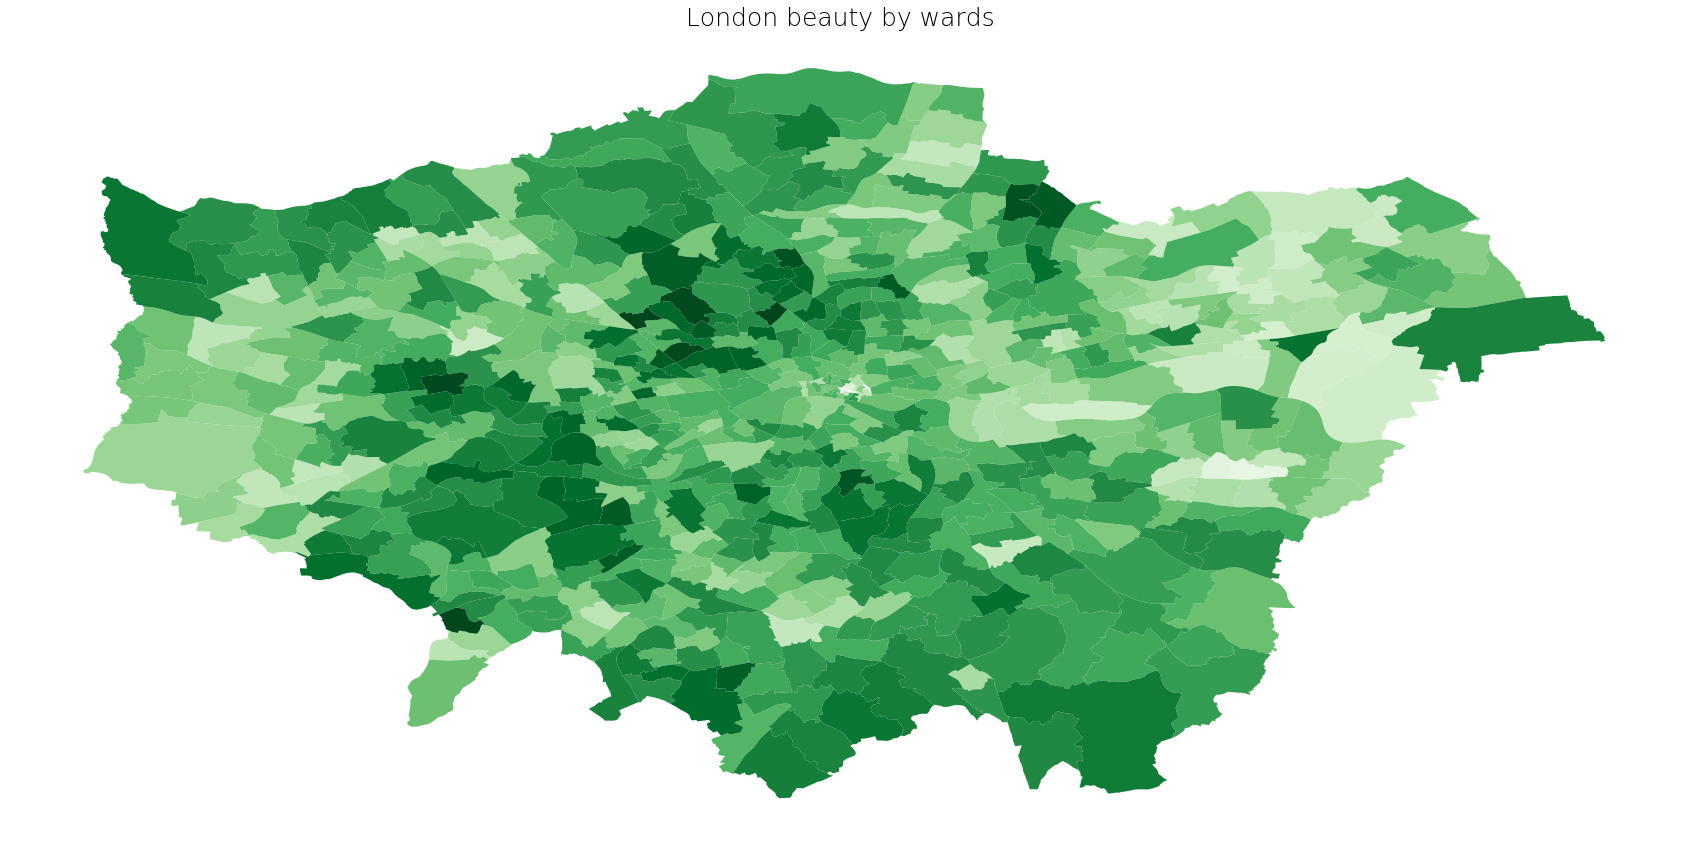

In [296]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax.axis('off')
ax.set_title('London beauty by wards ', fontdict={'fontsize': '25', 'fontweight' : '5'})
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=wards_with_beauty['bscore'].min(), vmax=wards_with_beauty['bscore'].max()))
# empty array for the data range
# sm._A = []
# add the colorbar to the figure
# cbar = fig.colorbar(sm)
sorted_beauty.plot(ax=ax,column='bscore', cmap='Greens', linewidth=0.8)
# sorted_beauty[:5].plot(ax=ax,column='bscore', cmap='Reds', linewidth=0.8)
# sorted_beauty[-5:].plot(ax=ax,column='bscore', cmap='Greens', linewidth=0.8)

# lowest = sorted_beauty[:5]
# highest = sorted_beauty[-5:]
# for x, y, label in zip(lowest.geometry.centroid.x, lowest.geometry.centroid.y, lowest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)
# for x, y, label in zip(highest.geometry.centroid.x, highest.geometry.centroid.y, highest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)

In [280]:
lowest

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry,Unnamed: 0,ward_name,bscore
647,Portsoken Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,729,1457,122516,11194,E05009308,6.288,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.07306 51.51181, -0.07389 51.51173...",625,Portsoken Ward,0.166667
629,Langbourn Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,697,1438,122513,11167,E05009306,5.193,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08306 51.51156, -0.08381 51.51165...",607,Langbourn Ward,0.166667
641,Walbrook Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,723,1451,122511,10980,E05009312,7.474,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08840 51.51279, -0.08858 51.51259...",619,Walbrook Ward,0.166667
312,Brampton Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,431,1070,50883,10839,E05000068,196.746,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((0.12593 51.47461, 0.12645 51.47477, ...",297,Brampton Ward,0.253333
642,Cornhill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,724,1452,122508,11166,E05009301,6.478,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08550 51.51484, -0.08532 51.51491...",620,Cornhill Ward,0.272727


In [281]:
wards_with_data = pd.merge(wards_shape , Ward_Flicker_Nature , left_on='CODE', right_on = 'GSS_CODE')

In [297]:
wards_with_data.columns

Index(['NAME', 'AREA_CODE', 'DESCRIPTIO', 'FILE_NAME', 'NUMBER', 'NUMBER0',
       'POLYGON_ID', 'UNIT_ID', 'CODE', 'HECTARES', 'AREA', 'TYPE_CODE',
       'DESCRIPT0', 'TYPE_COD0', 'DESCRIPT1', 'geometry', 'GSS_CODE',
       'tag_count', 'nature_tags', 'diversity_tags', 'food_tags',
       'emissions_tags', 'industry_tags', 'tobacco_tags', 'cleaning_tags',
       'waste_tags', 'animals_tags', 'nature_tags_score',
       'diversity_tags_score', 'food_tags_score', 'emissions_tags_score',
       'industry_tags_score', 'tobacco_tags_score', 'cleaning_tags_score',
       'waste_tags_score', 'animals_tags_score'],
      dtype='object')

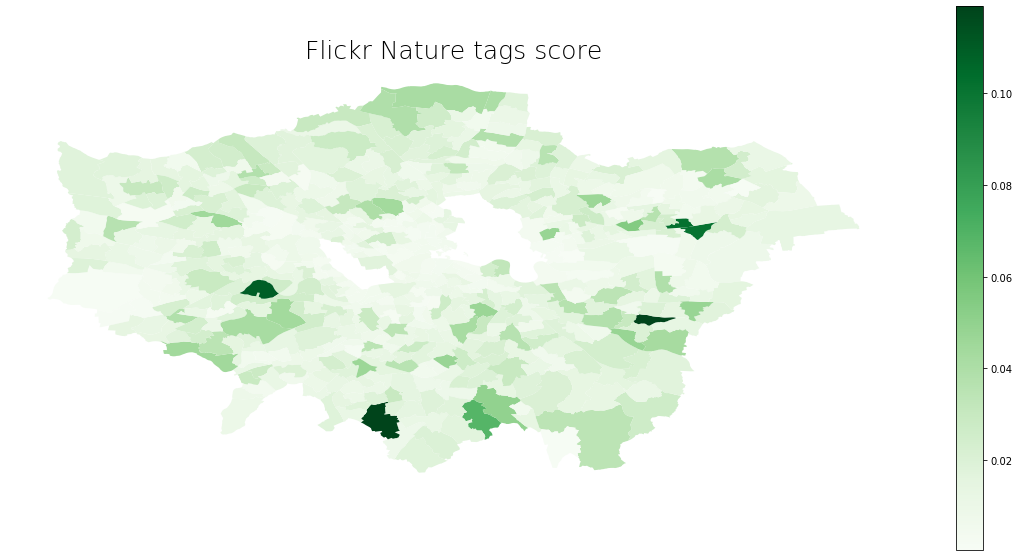

In [283]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr Nature tags score', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['nature_tags_score'].min(), vmax=wards_with_data['nature_tags_score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='nature_tags_score', cmap='Greens', linewidth=0.8)

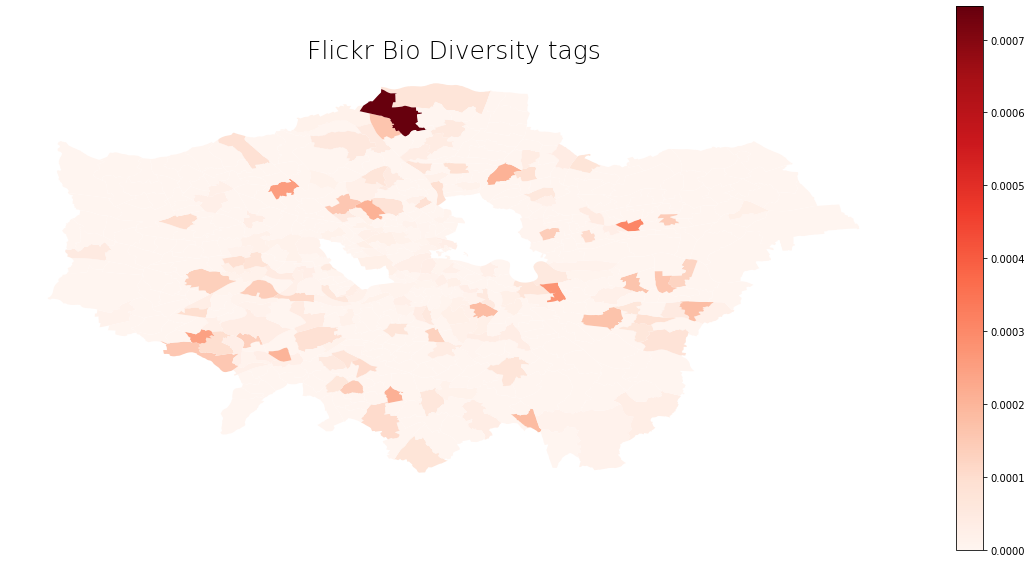

In [284]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr Bio Diversity tags', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=wards_with_data['diversity_tags_score'].min(), vmax=wards_with_data['diversity_tags_score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='diversity_tags_score', cmap='Reds', linewidth=0.8)

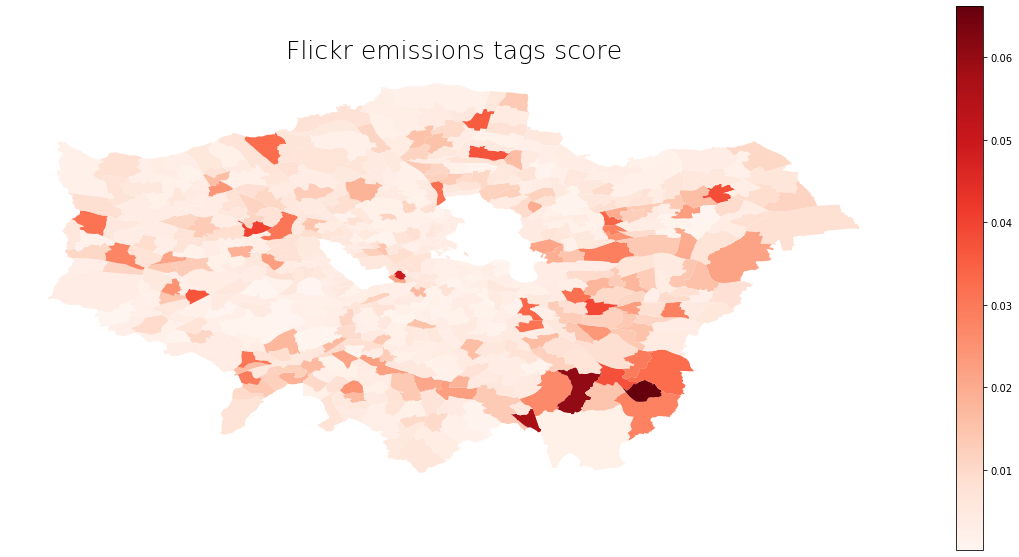

In [288]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr emissions tags score', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=wards_with_data['emissions_tags_score'].min(), vmax=wards_with_data['emissions_tags_score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='emissions_tags_score', cmap='Reds', linewidth=0.8)

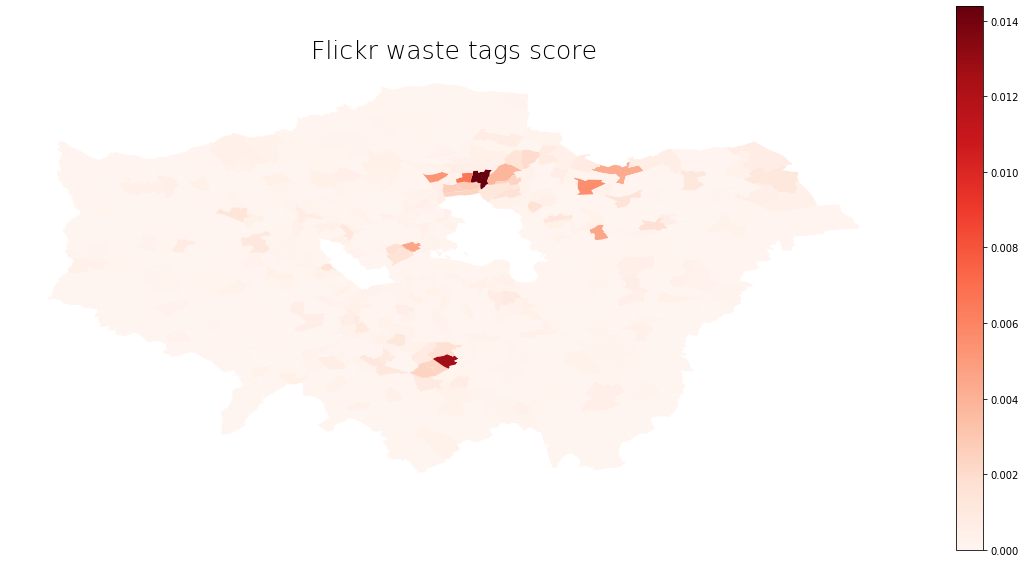

In [290]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr waste tags score', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=wards_with_data['waste_tags_score'].min(), vmax=wards_with_data['waste_tags_score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='waste_tags_score', cmap='Reds', linewidth=0.8)

[food_tags_score 	emissions_tags_score 	industry_tags_score 	tobacco_tags_score 	cleaning_tags_score 	waste_tags_score 	animals_tags_score]

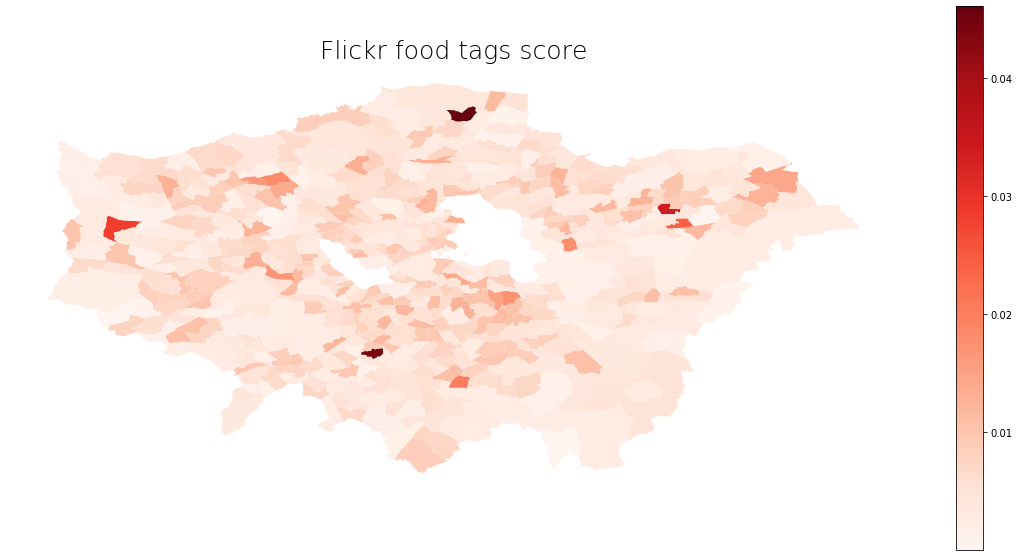

In [292]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr food tags score', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=wards_with_data['food_tags_score'].min(), vmax=wards_with_data['food_tags_score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='food_tags_score', cmap='Reds', linewidth=0.8)

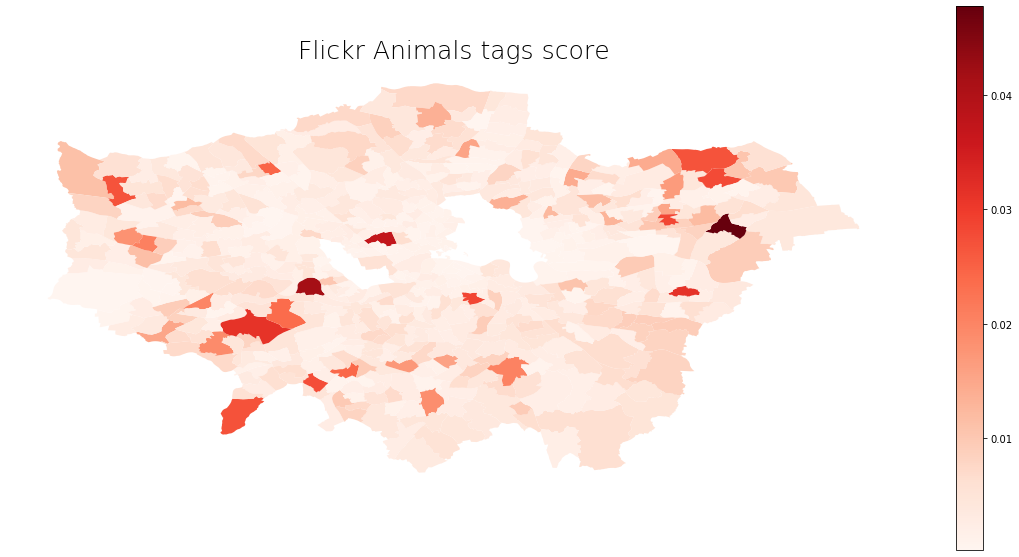

In [293]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr Animals tags score', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=wards_with_data['animals_tags_score'].min(), vmax=wards_with_data['animals_tags_score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='animals_tags_score', cmap='Reds', linewidth=0.8)